In [12]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D


# Constants

In [13]:
PATH_DATA = Path.cwd().parent.parent.parent / 'data'
PATH_DATA.exists()

True

In [14]:
PATH_SCRAPED = PATH_DATA / "raw" / "scraped"
PATH_SCRAPED.exists()

True

In [15]:
PATH_RESULTS_ARCHAEA = (PATH_DATA / "results" / "archaea")
PATH_RESULTS_ARCHAEA.exists()

True

In [16]:
PATH_TAXONOMY_ARCHAEA = (PATH_SCRAPED / "archaea" / "taxonomy")
PATH_TAXONOMY_ARCHAEA.exists()

True

In [17]:
PATH_RESULTS_BACTERIA = (PATH_DATA / "results" / "bacteria")
PATH_RESULTS_BACTERIA.exists()

True

In [18]:
PATH_RESULTS_HM = PATH_DATA / "results" / "human_microbiome"

# Archaea

## Data Extraction

In [19]:
df_archaea = pd.read_csv(PATH_RESULTS_ARCHAEA / 'mfa_archaea.csv', sep=';', dtype=str)
df_archaea = df_archaea.replace({',': '.'}, regex=True)
df_archaea = df_archaea.apply(pd.to_numeric, errors='ignore')
df_archaea

C:\Users\Diego\AppData\Local\Temp\ipykernel_29256\1059225361.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_archaea = df_archaea.apply(pd.to_numeric, errors='ignore')


,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-20.0,-61.994322,2.952111,0.998501,1.351540
1,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-19.0,-58.900917,2.945046,0.998499,1.351540
2,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-18.0,-55.807529,2.937238,0.998497,1.351540
3,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-17.0,-52.714165,2.928565,0.998494,1.351540
4,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-16.0,-49.620837,2.918873,0.998492,1.351540
...,...,...,...,...,...,...,...,...,...,...
195647,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,16.0,24.122574,1.608172,0.997867,1.240771
195648,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,17.0,25.639228,1.602452,0.997806,1.240771
195649,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,18.0,27.154290,1.597311,0.997750,1.240771
195650,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,19.0,28.668059,1.592670,0.997698,1.240771


In [20]:
df_archaea.dtypes

name           object
url            object
sequence       object
seq_length      int64
GC_content    float64
Q             float64
Tau(Q)        float64
D(Q)          float64
r_squared     float64
Delta_Dq      float64
dtype: object

## Data Preparation

In [21]:
df_composite_key_archaea = df_archaea.drop_duplicates(subset=['GC_content', 'Delta_Dq', 'sequence'])
df_composite_key_archaea.shape

(4772, 10)

In [22]:
# if 'sequence' ends in 'segment_1' -> df_composite_key_archaea['segment'] = 1
# if 'sequence' ends in 'segment_2' -> df_composite_key_archaea['segment'] = 2
# if 'sequence' ends in 'segment_3' -> df_composite_key_archaea['segment'] = 3
# else -> df_composite_key_archaea['segment'] = -1

df_composite_key_archaea['segment'] = np.where(
    df_composite_key_archaea['sequence'].str.endswith('segment_1'), 1,
    np.where(
        df_composite_key_archaea['sequence'].str.endswith('segment_2'), 2,
        np.where(
            df_composite_key_archaea['sequence'].str.endswith('segment_3'), 3,
            -1  # default value if none of the conditions are met
        )
    )
)

C:\Users\Diego\AppData\Local\Temp\ipykernel_29256\2466586683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_composite_key_archaea['segment'] = np.where(


In [23]:
df_composite_key_archaea.head()

,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq,segment
0,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-20.0,-61.994322,2.952111,0.998501,1.351540,-1
41,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens_segment_1,775646,0.339716,-20.0,-60.598942,2.885664,0.992157,1.296641,1
82,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens_segment_2,775646,0.337998,-20.0,-61.793590,2.942552,0.984740,1.353972,2
123,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens_segment_3,775646,0.353280,-20.0,-57.787289,2.751776,0.999310,1.145961,3
164,Acidianus_brierleyi,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_brierleyi,2947156,0.319039,-20.0,-64.156670,3.055080,0.998791,1.538267,-1


## Dq vs GC

### All segments

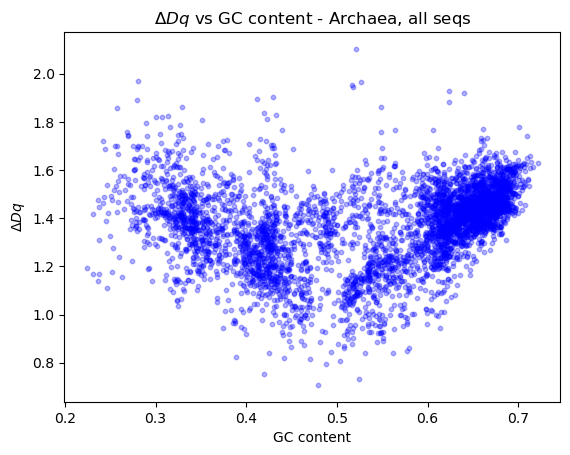

In [24]:
plt.scatter(
    x=df_composite_key_archaea['GC_content'],
    y=df_composite_key_archaea['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

plt.title(r'$\Delta Dq$ vs GC content - Archaea, all seqs')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.show()

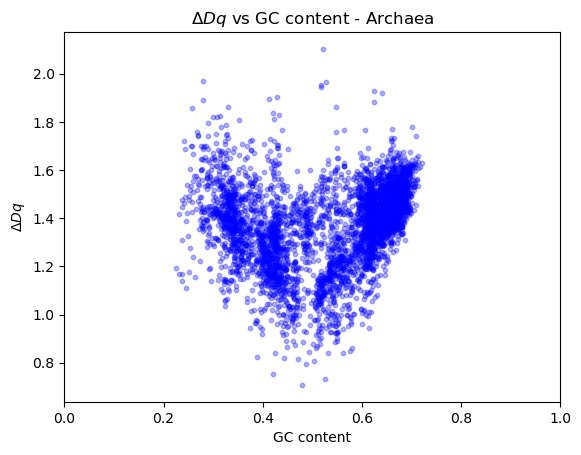

In [25]:
plt.scatter(
    x=df_composite_key_archaea['GC_content'],
    y=df_composite_key_archaea['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

plt.title(r'$\Delta Dq$ vs GC content - Archaea')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.xlim(0, 1)

plt.show()

### Best fit parabola

In [26]:
x_archaea = df_composite_key_archaea['GC_content']
y_archaea = df_composite_key_archaea['Delta_Dq']

# Fit a second-degree polynomial (parabola) to the data
coefficients_archaea = np.polyfit(x_archaea, y_archaea, 2)  # 2 is the degree of the polynomial
coefficients_archaea

array([ 6.46224942, -6.21985997,  2.74403703])

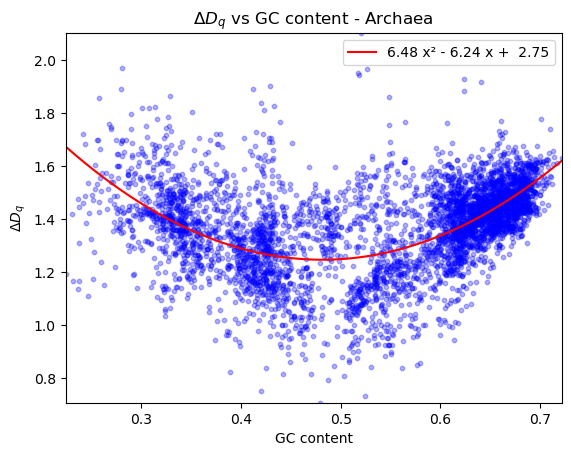

In [27]:
# Generate a range of x_archaea values (for plotting the fitted curve)
x_fit_archaea = np.linspace(0, 1, 1000)

# Calculate the corresponding y values using the fitted polynomial
y_fit_archaea = np.polyval(coefficients_archaea, x_fit_archaea)

plt.scatter(
    x=df_composite_key_archaea['GC_content'],
    y=df_composite_key_archaea['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

# Plot the fitted parabola
plt.plot(x_fit_archaea, y_fit_archaea, color='red', label='6.48 x² - 6.24 x +  2.75')
plt.legend()

plt.title(r'$\Delta D_q$ vs GC content - Archaea')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta D_q$')

plt.xlim(x_archaea.min(), x_archaea.max())
plt.ylim(y_archaea.min(), y_archaea.max())

plt.show()

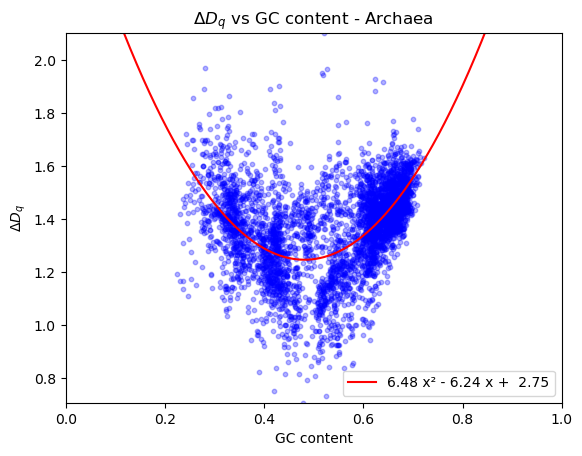

In [28]:
# Generate a range of x_archaea values (for plotting the fitted curve)
x_fit_archaea = np.linspace(0, 1, 1000)

# Calculate the corresponding y values using the fitted polynomial
y_fit_archaea = np.polyval(coefficients_archaea, x_fit_archaea)

plt.scatter(
    x=df_composite_key_archaea['GC_content'],
    y=df_composite_key_archaea['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

# Plot the fitted parabola
plt.plot(x_fit_archaea, y_fit_archaea, color='red', label='6.48 x² - 6.24 x +  2.75')
plt.legend()

plt.title(r'$\Delta D_q$ vs GC content - Archaea')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta D_q$')

plt.xlim(0, 1)
plt.ylim(y_archaea.min(), y_archaea.max())

plt.show()

### Differentiated segments

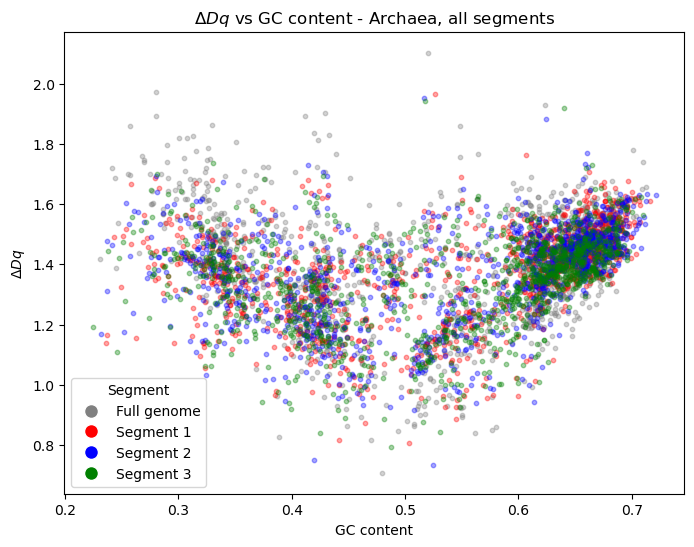

In [29]:
# Get the unique segment values
unique_segments = df_composite_key_archaea['segment'].unique()
unique_segments = np.sort(unique_segments)  # Sort for consistent color mapping

# Create a colormap with as many colors as unique segments
# colors = cm.get_cmap('tab10', len(unique_segments))  # You can choose a different colormap if you prefer
colors = ['gray', 'red', 'blue', 'green']

# Set up the plot
plt.figure(figsize=(8, 6))

# Initialize a list to store custom legend handles
legend_handles = []

# Loop over each segment and plot its data
for i, segment in enumerate(unique_segments):
    # Filter the DataFrame for the current segment
    segment_data = df_composite_key_archaea[df_composite_key_archaea['segment'] == segment]
    
    # Plot the data for the current segment
    plt.scatter(
        x=segment_data['GC_content'],
        y=segment_data['Delta_Dq'],
        s=10,
        # c=[colors(i)],
        c=colors[i],
        alpha=0.35,
        label=f'Segment {segment}' if segment != -1 else 'Full genome'
    )

    # Create a custom legend handle with full opacity
    legend_handle = Line2D(
        [0], [0],
        marker='o',
        color='w',
        label=f'Segment {segment}' if segment != -1 else 'Full genome',
        markerfacecolor=colors[i],
        markersize=10
    )
    legend_handles.append(legend_handle)

# Add plot title and labels
plt.title(r'$\Delta Dq$ vs GC content - Archaea, all segments')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

# Add legend
plt.legend(handles=legend_handles, title='Segment')

# Display the plot
plt.show()




<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_29256\1160237618.py:27: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta Dq$ vs GC content - Archaea, {segment_label}')


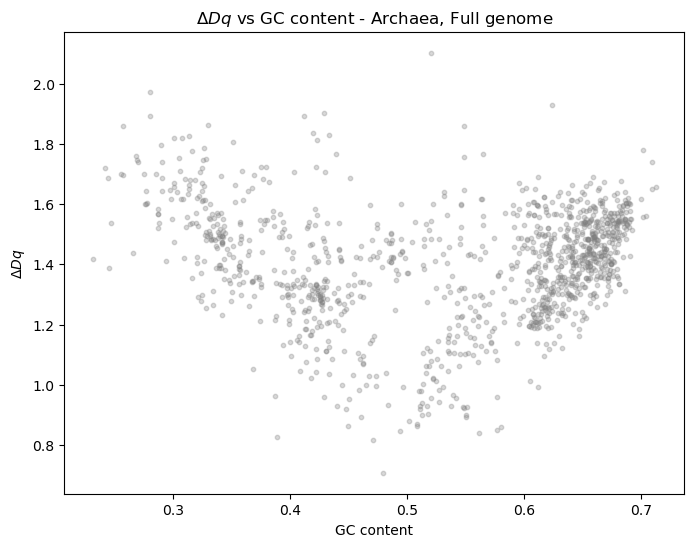

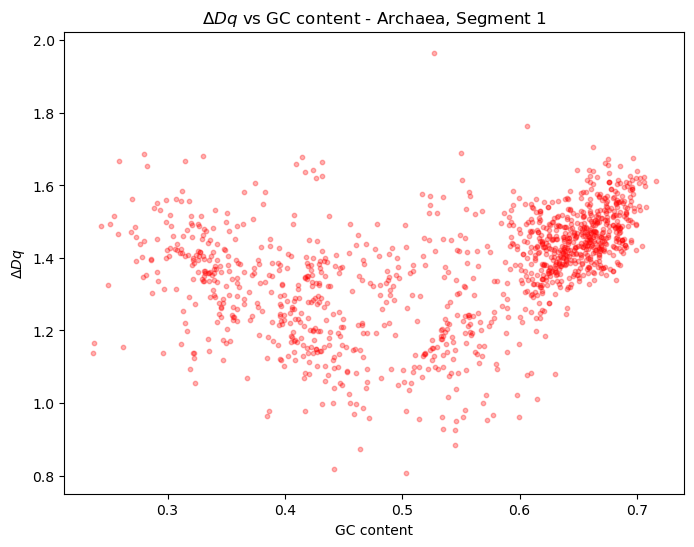

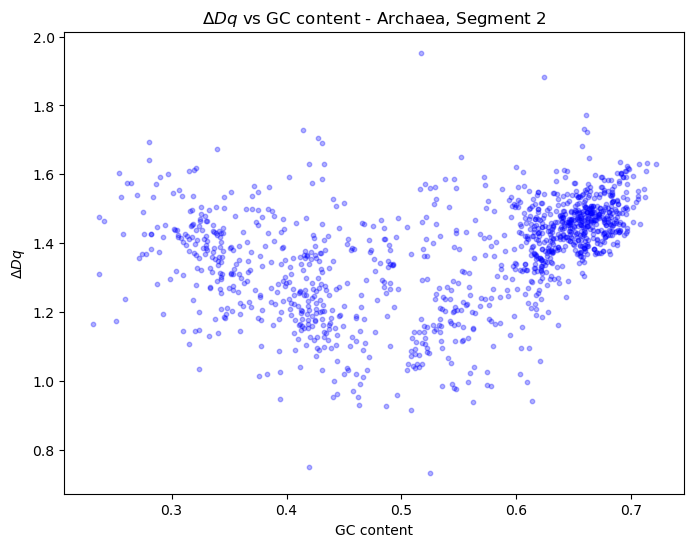

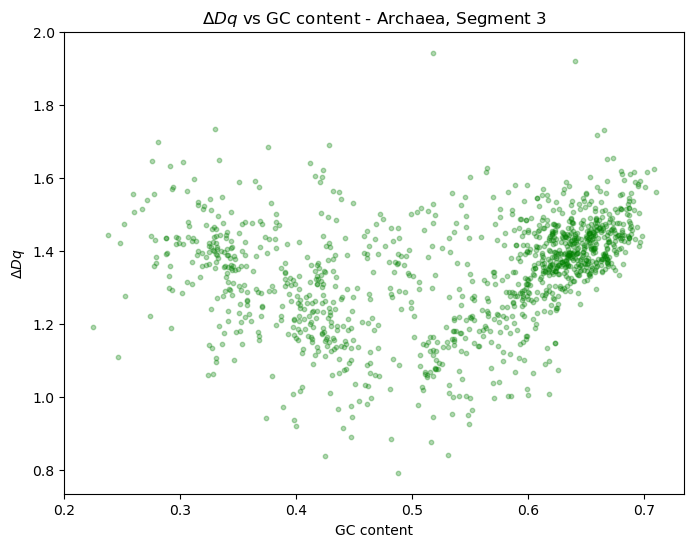

In [30]:
# Get the unique segment values
unique_segments = df_composite_key_archaea['segment'].unique()
unique_segments = np.sort(unique_segments)  # Sort for consistent ordering

# Define colors for each segment if desired
colors = ['gray', 'red', 'blue', 'green']

# Loop over each segment and create a separate plot
for i, segment in enumerate(unique_segments):
    # Filter the DataFrame for the current segment
    segment_data = df_composite_key_archaea[df_composite_key_archaea['segment'] == segment]
    
    # Set up a new figure for each segment
    plt.figure(figsize=(8, 6))
    
    # Plot the data for the current segment
    plt.scatter(
        x=segment_data['GC_content'],
        y=segment_data['Delta_Dq'],
        s=10,
        c=colors[i],  # Assign a color to each segment
        alpha=0.3,
    )
    
    # Add plot title and labels
    segment_label = f'Segment {int(segment)}' if segment != -1 else 'Full genome'
    plt.title(f'$\Delta Dq$ vs GC content - Archaea, {segment_label}')
    plt.xlabel('GC content')
    plt.ylabel(r'$\Delta Dq$')
    
    # Optionally, add a legend if needed
    # plt.legend([segment_label])
    
    # Display the plot
    plt.show()


# Bacteria

## Data Extraction

In [31]:
df_bacteria_0_35k = pd.read_csv(PATH_RESULTS_BACTERIA / 'mfa_bacteria_0_35000.csv', sep=';', dtype=str)
df_bacteria_0_35k

,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,"0,5426839632856774","-20,0","-72,66465514634189","3,4602216736353277","0,9698146394684455","2,136053987504341"
1,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,"0,5426839632856774","-19,0","-69,06562170824506","3,453281085412253","0,9700241704080936","2,136053987504341"
2,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,"0,5426839632856774","-18,0","-65,4663970739676","3,4455998459982946","0,9702559315728465","2,136053987504341"
3,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,"0,5426839632856774","-17,0","-61,866949855097616","3,437052769727645","0,9705136434109122","2,136053987504341"
4,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,"0,5426839632856774","-16,0","-58,267243922844344","3,4274849366379025","0,9708019026058612","2,136053987504341"
...,...,...,...,...,...,...,...,...,...,...
5539259,PVC_group_bacterium,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pvc_group_bacterium_segment_3,1460619,"0,6363076202623682","16,0","21,465132664000123","1,4310088442666749","0,9976833291538687","1,4348619472405753"
5539260,PVC_group_bacterium,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pvc_group_bacterium_segment_3,1460619,"0,6363076202623682","17,0","22,81927140198009","1,4262044626237556","0,9976479303763938","1,4348619472405753"
5539261,PVC_group_bacterium,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pvc_group_bacterium_segment_3,1460619,"0,6363076202623682","18,0","24,172991159683413","1,4219406564519654","0,9976172541412566","1,4348619472405753"
5539262,PVC_group_bacterium,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pvc_group_bacterium_segment_3,1460619,"0,6363076202623682","19,0","25,526317899456267","1,4181287721920148","0,9975905129762491","1,4348619472405753"


In [32]:
df_bacteria_35k_52k = pd.read_csv(PATH_RESULTS_BACTERIA / 'mfa_bacteria_35000_52909.csv', sep=';', dtype=str)
df_bacteria_35k_52k

,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Pseudodesulfovibrio_indicus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pseudodesulfovibrio_indicus,3966573,"0,634883563216913","-20,0","-58,22372404009182","2,77255828762342","0,998439748513986","1,2478087067971309"
1,Pseudodesulfovibrio_indicus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pseudodesulfovibrio_indicus,3966573,"0,634883563216913","-19,0","-55,31755996878647","2,7658779984393234","0,9984547716999835","1,2478087067971309"
2,Pseudodesulfovibrio_indicus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pseudodesulfovibrio_indicus,3966573,"0,634883563216913","-18,0","-52,41184580682713","2,7585182003593225","0,9984714685532762","1,2478087067971309"
3,Pseudodesulfovibrio_indicus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pseudodesulfovibrio_indicus,3966573,"0,634883563216913","-17,0","-49,506696847686705","2,750372047093706","0,9984901100821286","1,2478087067971309"
4,Pseudodesulfovibrio_indicus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pseudodesulfovibrio_indicus,3966573,"0,634883563216913","-16,0","-46,602267713291056","2,7413098654877093","0,9985110304927113","1,2478087067971309"
...,...,...,...,...,...,...,...,...,...,...
3417591,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_3,640617,"0,45795381639887794","16,0","24,041505273994705","1,6027670182663136","0,9983998418704588","1,2856818438370474"
3417592,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_3,640617,"0,45795381639887794","17,0","25,564688499910517","1,5977930312444073","0,9983302561291089","1,2856818438370474"
3417593,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_3,640617,"0,45795381639887794","18,0","27,08653137280582","1,5933253748709306","0,9982699578190471","1,2856818438370474"
3417594,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_3,640617,"0,45795381639887794","19,0","28,607184008911975","1,5892880004951098","0,9982175466913437","1,2856818438370474"


## Dq vs GC

### Data Preparation

In [33]:
df_composite_key_bacteria_0_35k = df_bacteria_0_35k.drop_duplicates(subset=['GC_content', 'Delta_Dq', 'sequence'])
df_composite_key_bacteria_0_35k.shape

(135104, 10)

In [34]:
df_composite_key_bacteria_0_35k = df_composite_key_bacteria_0_35k.replace({',': '.'}, regex=True)
df_composite_key_bacteria_0_35k = df_composite_key_bacteria_0_35k.apply(pd.to_numeric, errors='ignore')

C:\Users\Diego\AppData\Local\Temp\ipykernel_29256\2150735517.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_composite_key_bacteria_0_35k = df_composite_key_bacteria_0_35k.apply(pd.to_numeric, errors='ignore')


In [35]:
df_composite_key_bacteria_35k_52k = df_bacteria_35k_52k.drop_duplicates(subset=['GC_content', 'Delta_Dq'])
df_composite_key_bacteria_35k_52k.shape

(68961, 10)

In [36]:
df_composite_key_bacteria_35k_52k = df_composite_key_bacteria_35k_52k.replace({',': '.'}, regex=True)
df_composite_key_bacteria_35k_52k = df_composite_key_bacteria_35k_52k.apply(pd.to_numeric, errors='ignore')

C:\Users\Diego\AppData\Local\Temp\ipykernel_29256\262946745.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_composite_key_bacteria_35k_52k = df_composite_key_bacteria_35k_52k.apply(pd.to_numeric, errors='ignore')


In [37]:
df_composite_key_bacteria = pd.concat([df_composite_key_bacteria_0_35k, df_composite_key_bacteria_35k_52k], ignore_index=True)
print(df_composite_key_bacteria.shape)
df_composite_key_bacteria

(204065, 10)


,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,0.542684,-20.0,-72.664655,3.460222,0.969815,2.136054
1,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense_segment_1,1202110,0.544933,-20.0,-67.746182,3.226009,0.942334,1.909285
2,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense_segment_2,1202110,0.543961,-20.0,-66.961196,3.188628,0.962745,1.863879
3,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense_segment_3,1202110,0.539157,-20.0,-68.399248,3.257107,0.933928,1.927774
4,Abiotrophia_defectiva,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abiotrophia_defectiva,2043439,0.469444,-20.0,-51.983359,2.475398,0.996970,0.811359
...,...,...,...,...,...,...,...,...,...,...
204060,Zymomonas_mobilis,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_mobilis_segment_3,685454,0.465150,-20.0,-60.810954,2.895760,0.994370,1.295974
204061,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp.,1921851,0.458903,-20.0,-63.408908,3.019472,0.996031,1.433338
204062,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_1,640617,0.459140,-20.0,-62.520256,2.977155,0.988585,1.401800
204063,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_2,640617,0.459615,-20.0,-61.116224,2.910296,0.993888,1.329194


In [38]:
# if 'sequence' ends in 'segment_1' -> df_composite_key_bacteria['segment'] = 1
# if 'sequence' ends in 'segment_2' -> df_composite_key_bacteria['segment'] = 2
# if 'sequence' ends in 'segment_3' -> df_composite_key_bacteria['segment'] = 3
# else -> df_composite_key_bacteria['segment'] = -1

df_composite_key_bacteria['segment'] = np.where(
    df_composite_key_bacteria['sequence'].str.endswith('segment_1'), 1,
    np.where(
        df_composite_key_bacteria['sequence'].str.endswith('segment_2'), 2,
        np.where(
            df_composite_key_bacteria['sequence'].str.endswith('segment_3'), 3,
            -1  # default value if none of the conditions are met
        )
    )
)

In [39]:
df_composite_key_bacteria.head(10)

,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq,segment
0,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,0.542684,-20.0,-72.664655,3.460222,0.969815,2.136054,-1
1,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense_segment_1,1202110,0.544933,-20.0,-67.746182,3.226009,0.942334,1.909285,1
2,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense_segment_2,1202110,0.543961,-20.0,-66.961196,3.188628,0.962745,1.863879,2
3,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense_segment_3,1202110,0.539157,-20.0,-68.399248,3.257107,0.933928,1.927774,3
4,Abiotrophia_defectiva,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abiotrophia_defectiva,2043439,0.469444,-20.0,-51.983359,2.475398,0.996970,0.811359,-1
5,Abiotrophia_defectiva,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abiotrophia_defectiva_segment_1,681146,0.463500,-20.0,-56.002290,2.666776,0.990827,1.043277,1
6,Abiotrophia_defectiva,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abiotrophia_defectiva_segment_2,681146,0.484809,-20.0,-56.075477,2.670261,0.988245,1.031772,2
7,Abiotrophia_defectiva,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abiotrophia_defectiva_segment_3,681146,0.460023,-20.0,-55.411197,2.638628,0.987735,0.940271,3
8,Abiotrophia_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abiotrophia_sp.,2016058,0.468279,-20.0,-51.421689,2.448652,0.997900,0.765295,-1
9,Abiotrophia_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abiotrophia_sp._segment_1,672019,0.469948,-20.0,-55.117013,2.624620,0.985780,0.963311,1


### All segments

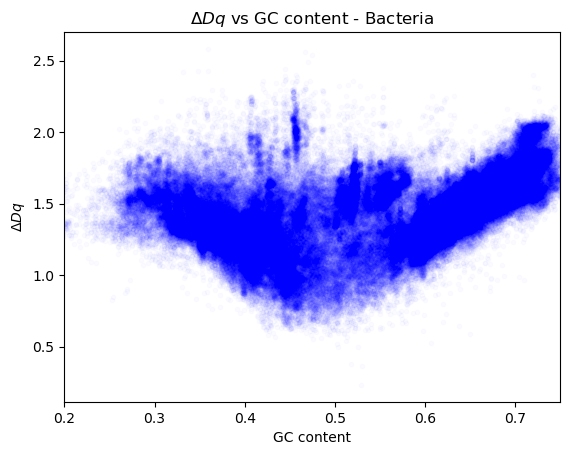

In [40]:
plt.scatter(
    x=df_composite_key_bacteria['GC_content'],
    y=df_composite_key_bacteria['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.015
)

plt.title(r'$\Delta Dq$ vs GC content - Bacteria')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.xlim(0.2, 0.75)

plt.show()

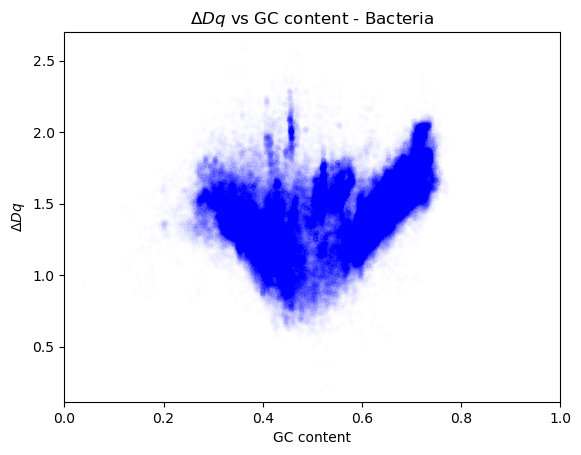

In [41]:
plt.scatter(
    x=df_composite_key_bacteria['GC_content'],
    y=df_composite_key_bacteria['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.009
)

plt.title(r'$\Delta Dq$ vs GC content - Bacteria')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.xlim(0, 1)

plt.show()

### Best fit parabola

In [42]:
x_bacteria = df_composite_key_bacteria['GC_content']
y_bacteria = df_composite_key_bacteria['Delta_Dq']

# Fit a second-degree polynomial (parabola) to the data
coefficients_bacteria = np.polyfit(x_bacteria, y_bacteria, 2)  # 2 is the degree of the polynomial
coefficients_bacteria

array([ 7.65921127, -7.23950182,  2.97896951])

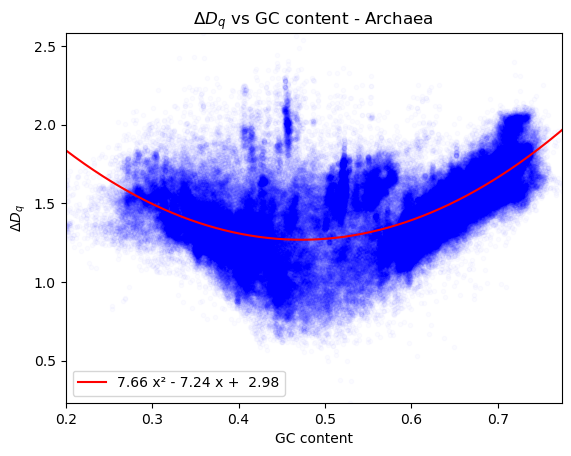

In [43]:
# Generate a range of x_bacteria values (for plotting the fitted curve)
x_fit_bacteria = np.linspace(0, 1, 1000)

# Calculate the corresponding y values using the fitted polynomial
y_fit_bacteria = np.polyval(coefficients_bacteria, x_fit_bacteria)

plt.scatter(
    x=df_composite_key_bacteria['GC_content'],
    y=df_composite_key_bacteria['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.015
)

# Plot the fitted parabola
plt.plot(x_fit_bacteria, y_fit_bacteria, color='red', label='7.66 x² - 7.24 x +  2.98')
plt.legend()

plt.title(r'$\Delta D_q$ vs GC content - Archaea')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta D_q$')

plt.xlim(0.2, x_bacteria.max())
plt.ylim(y_bacteria.min(), y_bacteria.max())

plt.show()



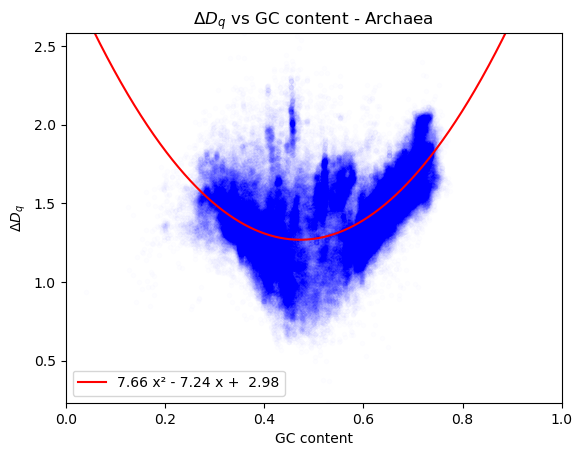

In [44]:
# Generate a range of x_bacteria values (for plotting the fitted curve)
x_fit_bacteria = np.linspace(0, 1, 1000)

# Calculate the corresponding y values using the fitted polynomial
y_fit_bacteria = np.polyval(coefficients_bacteria, x_fit_bacteria)

plt.scatter(
    x=df_composite_key_bacteria['GC_content'],
    y=df_composite_key_bacteria['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.009
)

# Plot the fitted parabola
plt.plot(x_fit_bacteria, y_fit_bacteria, color='red', label='7.66 x² - 7.24 x +  2.98')
plt.legend()

plt.title(r'$\Delta D_q$ vs GC content - Archaea')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta D_q$')

plt.xlim(0, 1)
plt.ylim(y_bacteria.min(), y_bacteria.max())

plt.show()

### Differentiated segments

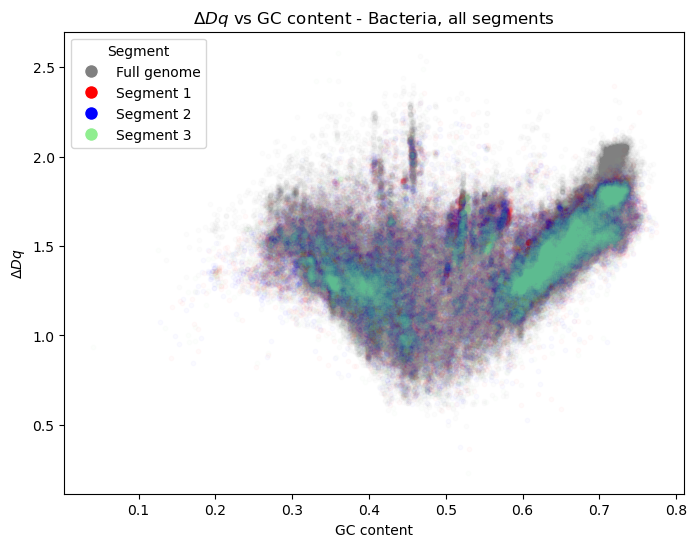

In [45]:
# Get the unique segment values
unique_segments = df_composite_key_bacteria['segment'].unique()
unique_segments = np.sort(unique_segments)  # Sort for consistent color mapping

# Define colors for each segment
colors = ['gray', 'red', 'blue', 'lightgreen']
# colors in order: [full_genome, segment_1, segment_2, segment_3]

# Set up the plot
plt.figure(figsize=(8, 6))

# Initialize a list to store custom legend handles
legend_handles = []

# Loop over each segment and plot its data
for i, segment in enumerate(unique_segments):
    # Filter the DataFrame for the current segment
    segment_data = df_composite_key_bacteria[df_composite_key_bacteria['segment'] == segment]
    
    # Plot the data for the current segment
    plt.scatter(
        x=segment_data['GC_content'],
        y=segment_data['Delta_Dq'],
        s=10,
        c=colors[i],
        alpha=0.02,  # Keep the scatter points transparent
        label=f'Segment {segment}' if segment != -1 else 'Full genome'
    )
    
    # Create a custom legend handle with full opacity
    legend_handle = Line2D(
        [0], [0],
        marker='o',
        color='w',
        label=f'Segment {segment}' if segment != -1 else 'Full genome',
        markerfacecolor=colors[i],
        markersize=10
    )
    legend_handles.append(legend_handle)

# Add plot title and labels
plt.title(r'$\Delta Dq$ vs GC content - Bacteria, all segments')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

# Add legend with custom handles
plt.legend(handles=legend_handles, title='Segment')

# Display the plot
plt.show()


<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_29256\1844971889.py:27: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta Dq$ vs GC content - Bacteria, {segment_label}')


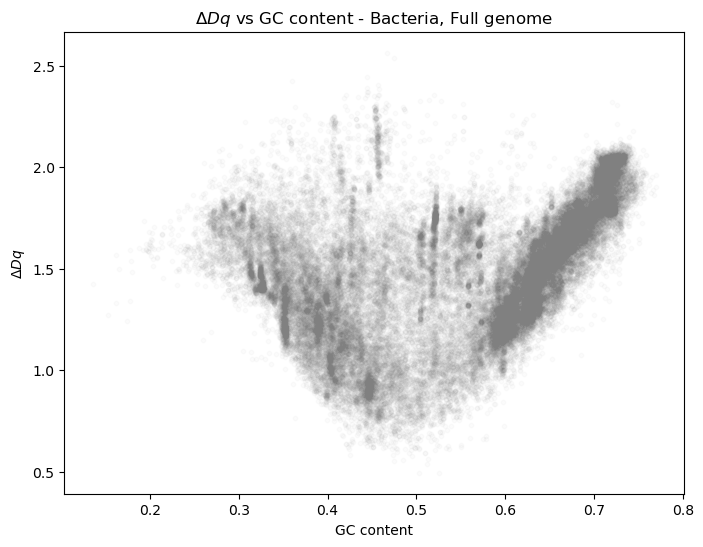

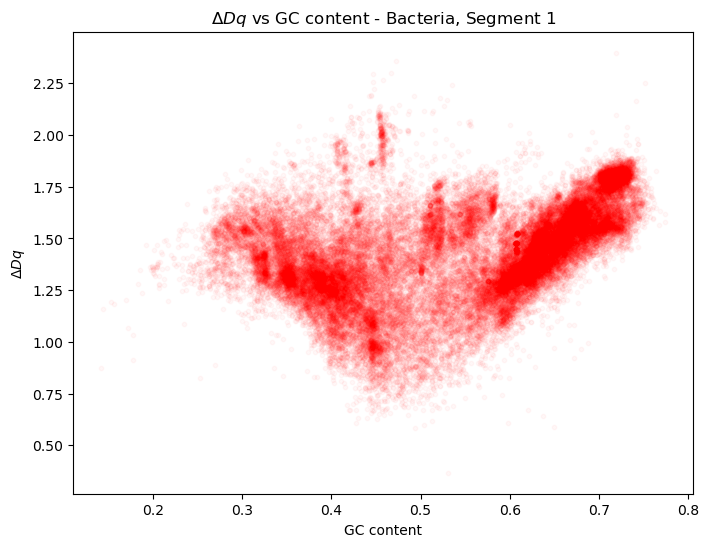

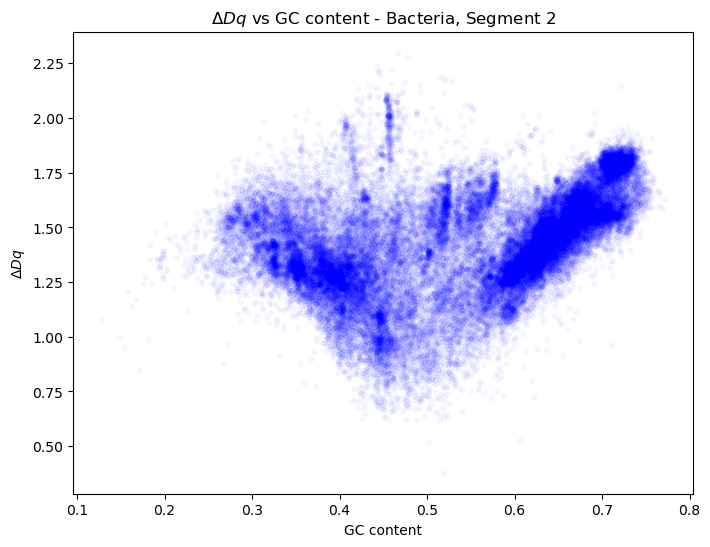

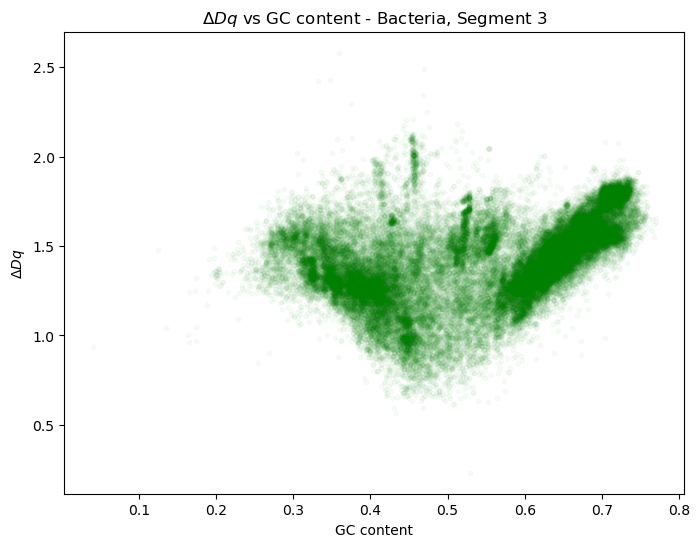

In [46]:
# Get the unique segment values
unique_segments = df_composite_key_bacteria['segment'].unique()
unique_segments = np.sort(unique_segments)  # Sort for consistent ordering

# Define colors for each segment if desired
colors = ['gray', 'red', 'blue', 'green']

# Loop over each segment and create a separate plot
for i, segment in enumerate(unique_segments):
    # Filter the DataFrame for the current segment
    segment_data = df_composite_key_bacteria[df_composite_key_bacteria['segment'] == segment]
    
    # Set up a new figure for each segment
    plt.figure(figsize=(8, 6))
    
    # Plot the data for the current segment
    plt.scatter(
        x=segment_data['GC_content'],
        y=segment_data['Delta_Dq'],
        s=10,
        c=colors[i],  # Assign a color to each segment
        alpha=0.03,
    )
    
    # Add plot title and labels
    segment_label = f'Segment {int(segment)}' if segment != -1 else 'Full genome'
    plt.title(f'$\Delta Dq$ vs GC content - Bacteria, {segment_label}')
    plt.xlabel('GC content')
    plt.ylabel(r'$\Delta Dq$')
    
    # Optionally, add a legend if needed
    # plt.legend([segment_label])
    
    # Display the plot
    plt.show()


# Human Microbiome

## Data Extraction

In [47]:
df_hm = pd.read_csv(PATH_RESULTS_HM / 'mfa_hm_url.csv', sep=';', dtype=str)
df_hm = df_hm.replace({',': '.'}, regex=True)
df_hm = df_hm.apply(pd.to_numeric, errors='ignore')
df_hm

C:\Users\Diego\AppData\Local\Temp\ipykernel_29256\2980110349.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_hm = df_hm.apply(pd.to_numeric, errors='ignore')


,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Achromobacter_piechaudii_ATCC_43553_uid46343,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-20.0,-63.263013,3.012524,0.992758,1.615916
1,Achromobacter_piechaudii_ATCC_43553_uid46343,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-19.0,-60.097422,3.004871,0.992778,1.615916
2,Achromobacter_piechaudii_ATCC_43553_uid46343,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-18.0,-56.932342,2.996439,0.992802,1.615916
3,Achromobacter_piechaudii_ATCC_43553_uid46343,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-17.0,-53.767871,2.987104,0.992832,1.615916
4,Achromobacter_piechaudii_ATCC_43553_uid46343,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-16.0,-50.604134,2.976714,0.992870,1.615916
...,...,...,...,...,...,...,...,...,...,...
37592,_Bacteroides__pectinophilus_ATCC_43243_uid27825,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_DS996921,2528381,0.418382,16.0,24.995198,1.666347,0.999600,1.447162
37593,_Bacteroides__pectinophilus_ATCC_43243_uid27825,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_DS996921,2528381,0.418382,17.0,26.579909,1.661244,0.999560,1.447162
37594,_Bacteroides__pectinophilus_ATCC_43243_uid27825,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_DS996921,2528381,0.418382,18.0,28.163527,1.656678,0.999523,1.447162
37595,_Bacteroides__pectinophilus_ATCC_43243_uid27825,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_DS996921,2528381,0.418382,19.0,29.746347,1.652575,0.999488,1.447162


## Data Preparation

In [48]:
df_composite_key_hm = df_hm.drop_duplicates(subset=['GC_content', 'Delta_Dq', 'sequence'])
df_composite_key_hm.shape

(917, 10)

In [49]:
df_composite_key_hm

,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Achromobacter_piechaudii_ATCC_43553_uid46343,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG770409,6115515,0.638748,-20.0,-63.263013,3.012524,0.992758,1.615916
41,Achromobacter_xylosoxidans_C54_uid38739,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GL636060,741255,0.655275,-20.0,-60.465531,2.879311,0.981706,1.499203
82,Acidaminococcus_D21_uid34117,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_ACGB01000001,138060,0.488853,-20.0,-55.118059,2.624669,0.986374,1.070254
123,Acinetobacter_ATCC_27244_uid30949,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG665949,481320,0.378322,-20.0,-60.156267,2.864584,0.985111,1.249041
164,Acinetobacter_baumannii_6013113_uid33017,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GL891580,349645,0.396056,-20.0,-58.450265,2.783346,0.984739,1.237412
...,...,...,...,...,...,...,...,...,...,...
37392,Veillonella_parvula_ATCC_17745_uid41557,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_ADFU01000017,582154,0.378300,-20.0,-58.838529,2.801835,0.996607,1.140742
37433,Veillonella_ratti_ACS_216_V_Col6b_uid52119,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_JH992936,1053529,0.417542,-20.0,-58.825181,2.801199,0.995044,1.143238
37474,Weissella_paramesenteroides_ATCC_33313_uid34661,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_GG697129,615831,0.380854,-20.0,-60.906469,2.900308,0.983706,1.310750
37515,Yokenella_regensburgei_ATCC_43003_uid65133,https://ftp.ncbi.nlm.nih.gov/genomes/HUMAN_MIC...,NZ_JH417874,2596006,0.546398,-20.0,-68.685970,3.270760,0.990531,1.718043


## Dq vs GC

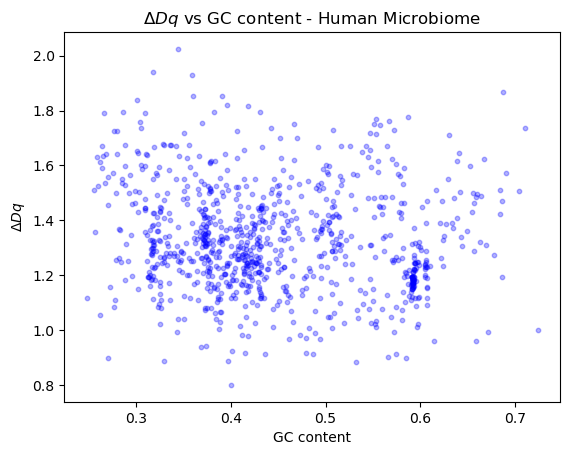

In [50]:
plt.scatter(
    x=df_composite_key_hm['GC_content'],
    y=df_composite_key_hm['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

plt.title(r'$\Delta Dq$ vs GC content - Human Microbiome')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.show()

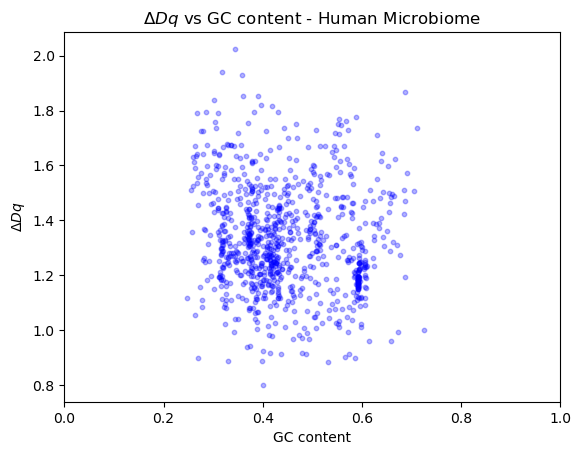

In [51]:
plt.scatter(
    x=df_composite_key_hm['GC_content'],
    y=df_composite_key_hm['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

plt.title(r'$\Delta Dq$ vs GC content - Human Microbiome')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.xlim(0, 1)

plt.show()